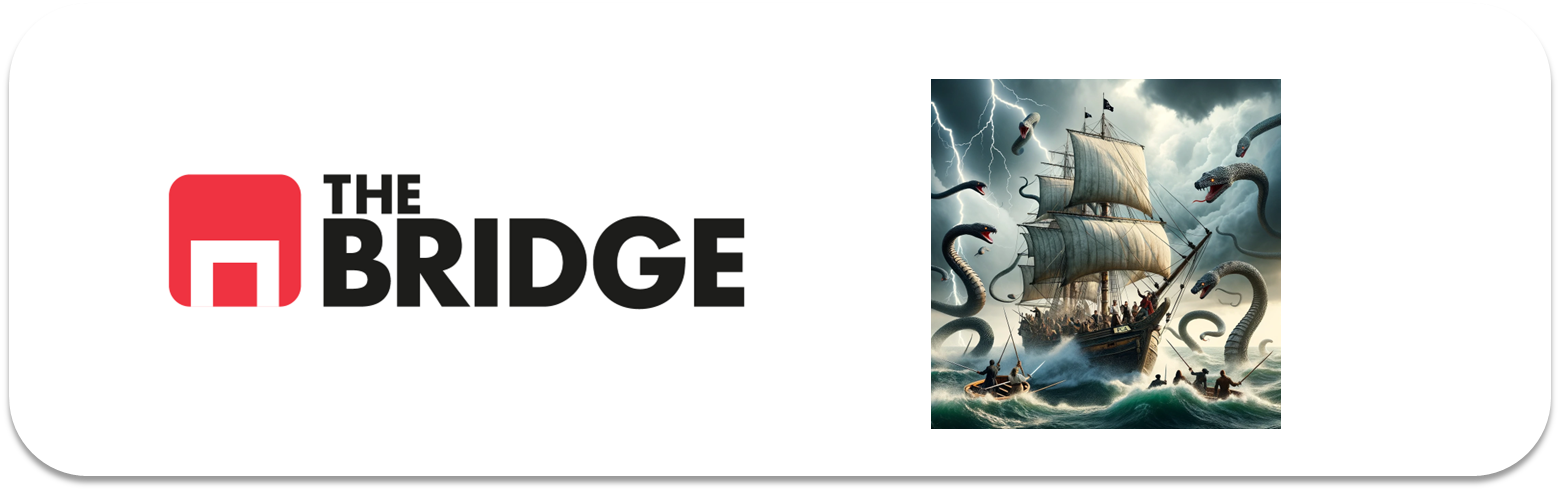

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
target = 'SeriousDlqin2yrs'

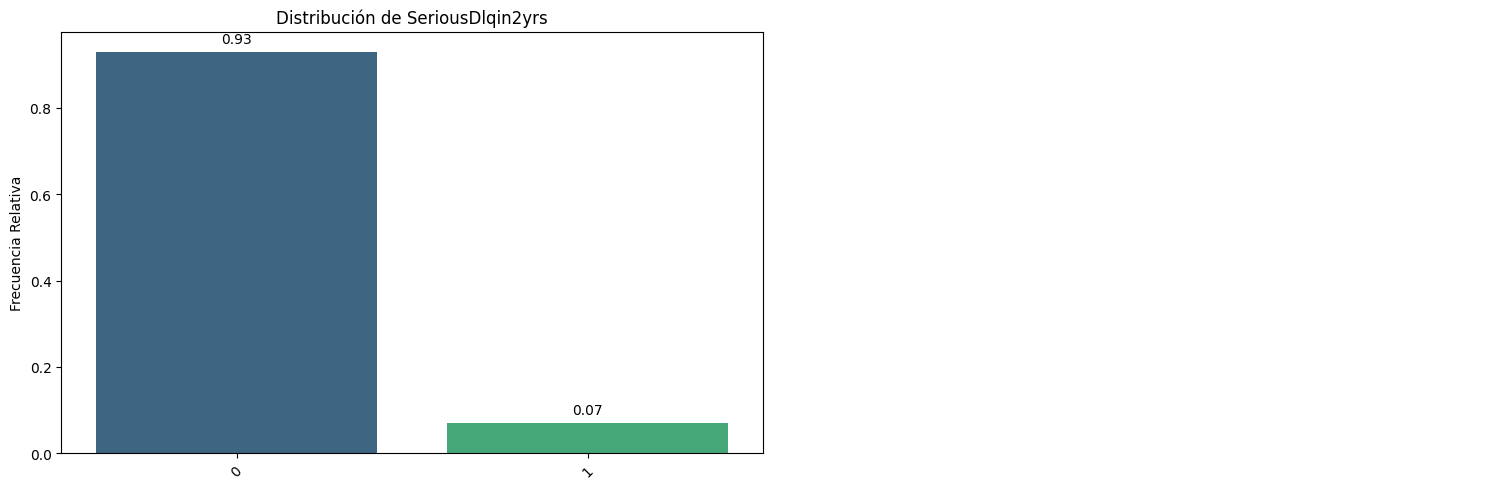

In [7]:
bt.pinta_distribucion_categoricas(train_set, [target], mostrar_valores= True, relativa= True)

Target super desbalanceado, utilizare balanced_accuracy

In [8]:
#Analizo que variables son categoricas y cuales numericas

In [9]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,9452.0,0.070144,0.255403,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,9452.0,0.335207,0.362233,0.0,0.034869,0.179211,0.587533,6.0
age,9452.0,51.491536,14.499298,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,9452.0,0.343314,2.930489,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,9452.0,0.486047,2.505031,0.0,0.146204,0.297564,0.477876,96.0
MonthlyIncome,9452.0,6868.428058,12580.543336,0.0,3466.000000,5441.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,9452.0,8.794647,5.139555,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,9452.0,0.180279,2.889984,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,9452.0,1.064325,1.148156,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,9452.0,0.152772,2.870119,0.0,0.000000,0.000000,0.000000,98.0


(10, 2)


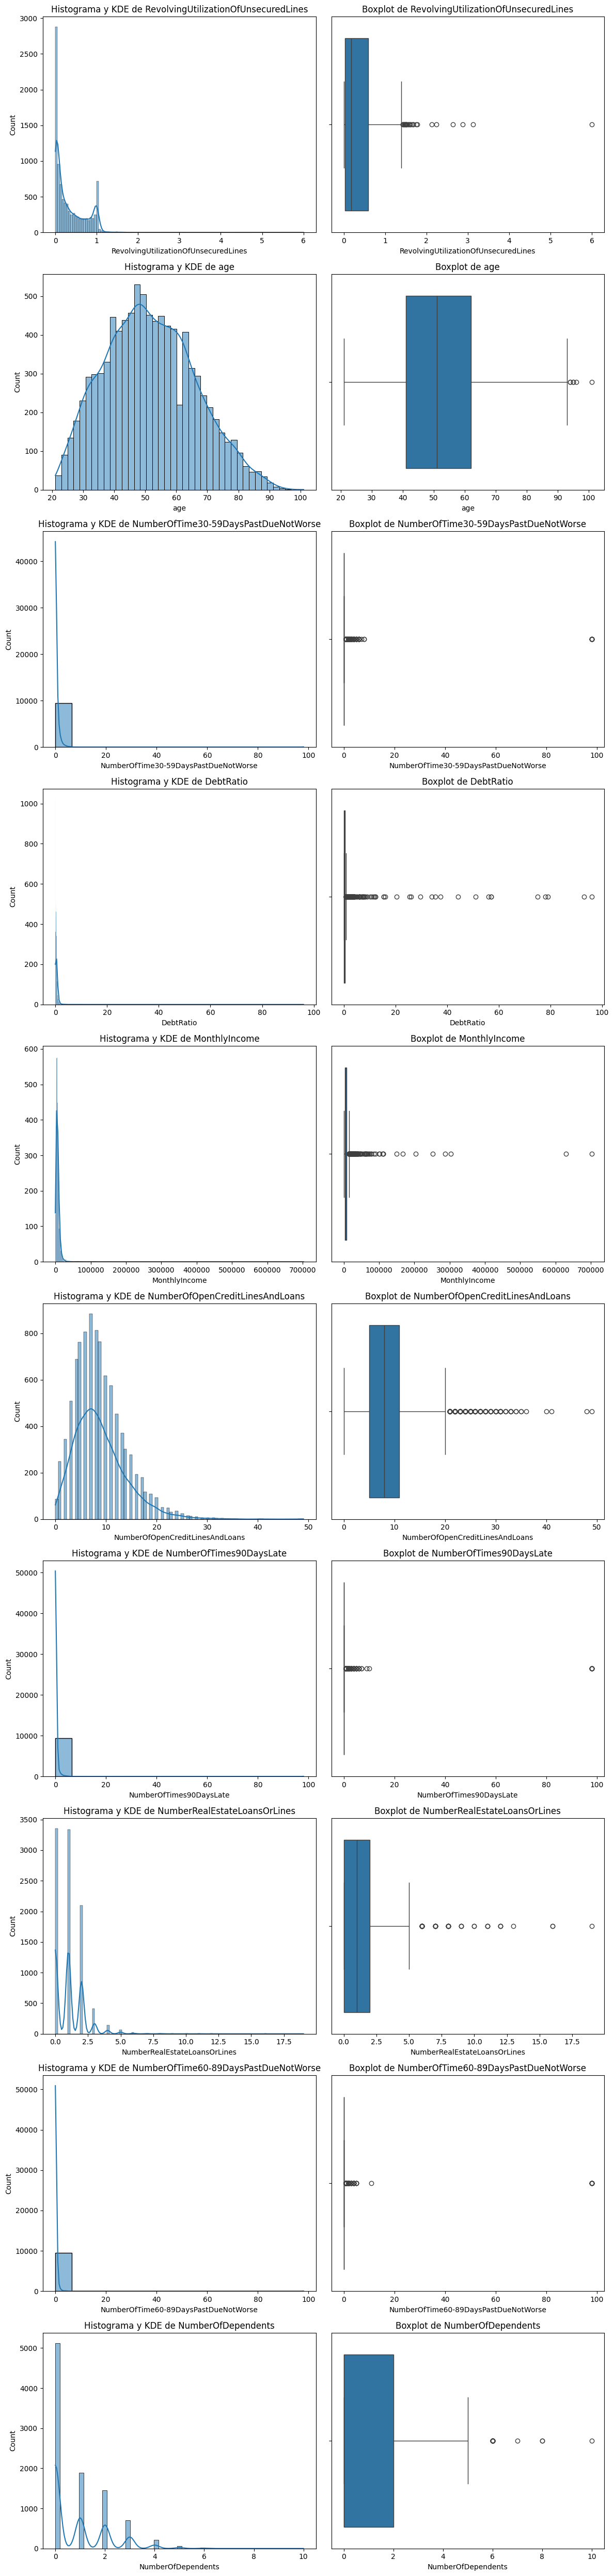

In [14]:
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != target])

RevolvingUtilizationOfUnsecuredLines: Númerica continua

age: Numérica discreta

NumberOfTime30-59DaysPastDueNotWorse: Voy a categorizar

DebtRatio: Numérica continua

MonthlyIncome: Numérica continua

NumberOfOpenCreditLinesAndLoans: Numérica continua.

NumberOfTimes90DaysLate: Voy a categorizarla

NumberRealEstateLoansOrLines: Veo que tiene varios outliers puntuales, analizare.. 

NumberOfTime60-89DaysPastDueNotWorse: A categorizar tambien

NumberOfDependents: Discreta.

In [15]:
features_num = ["RevolvingUtilizationOfUnsecuredLines","age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfDependents"]

In [16]:
train_set['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(True)

NumberOfTime30-59DaysPastDueNotWorse
0     0.831147
1     0.113521
2     0.033644
3     0.010897
4     0.005607
5     0.002116
6     0.001904
98    0.000846
8     0.000212
7     0.000106
Name: proportion, dtype: float64

In [19]:
#Divido en 3

labels = [0,1,2]

train_set["N30-59"] = pd.cut(train_set["NumberOfTime30-59DaysPastDueNotWorse"], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) 
test_set["N30-59"] = pd.cut(test_set["NumberOfTime30-59DaysPastDueNotWorse"], bins = [-1,0,1,10000], labels = labels, right= True).astype(int) 
train_set["N30-59"].value_counts(True)


N30-59
0    0.831147
1    0.113521
2    0.055332
Name: proportion, dtype: float64

In [18]:
train_set["NumberOfTime60-89DaysPastDueNotWorse"].value_counts(True)

NumberOfTime60-89DaysPastDueNotWorse
0     0.947207
1     0.040521
2     0.008041
3     0.001481
4     0.001375
98    0.000846
5     0.000423
11    0.000106
Name: proportion, dtype: float64

In [20]:
# Divido en 2

train_set["N60-89"] = (train_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
test_set["N60-89"] = (test_set["NumberOfTime60-89DaysPastDueNotWorse"] > 0).astype(int)
train_set["N60-89"].value_counts(True)

N60-89
0    0.947207
1    0.052793
Name: proportion, dtype: float64

In [21]:
train_set["NumberOfTimes90DaysLate"].value_counts(True)

NumberOfTimes90DaysLate
0     0.943610
1     0.033115
2     0.012590
3     0.004655
4     0.002751
5     0.001481
98    0.000846
6     0.000529
7     0.000212
9     0.000106
10    0.000106
Name: proportion, dtype: float64

In [22]:
#Divido en 2 categorias tambien

train_set["N90"] = (train_set["NumberOfTimes90DaysLate"] > 0).astype(int)
test_set["N90"] = (test_set["NumberOfTimes90DaysLate"] > 0).astype(int)
train_set["N90"].value_counts(True)

N90
0    0.94361
1    0.05639
Name: proportion, dtype: float64

In [23]:
features_cat = ["N30-59","N60-89","N90"]
features_cat

['N30-59', 'N60-89', 'N90']

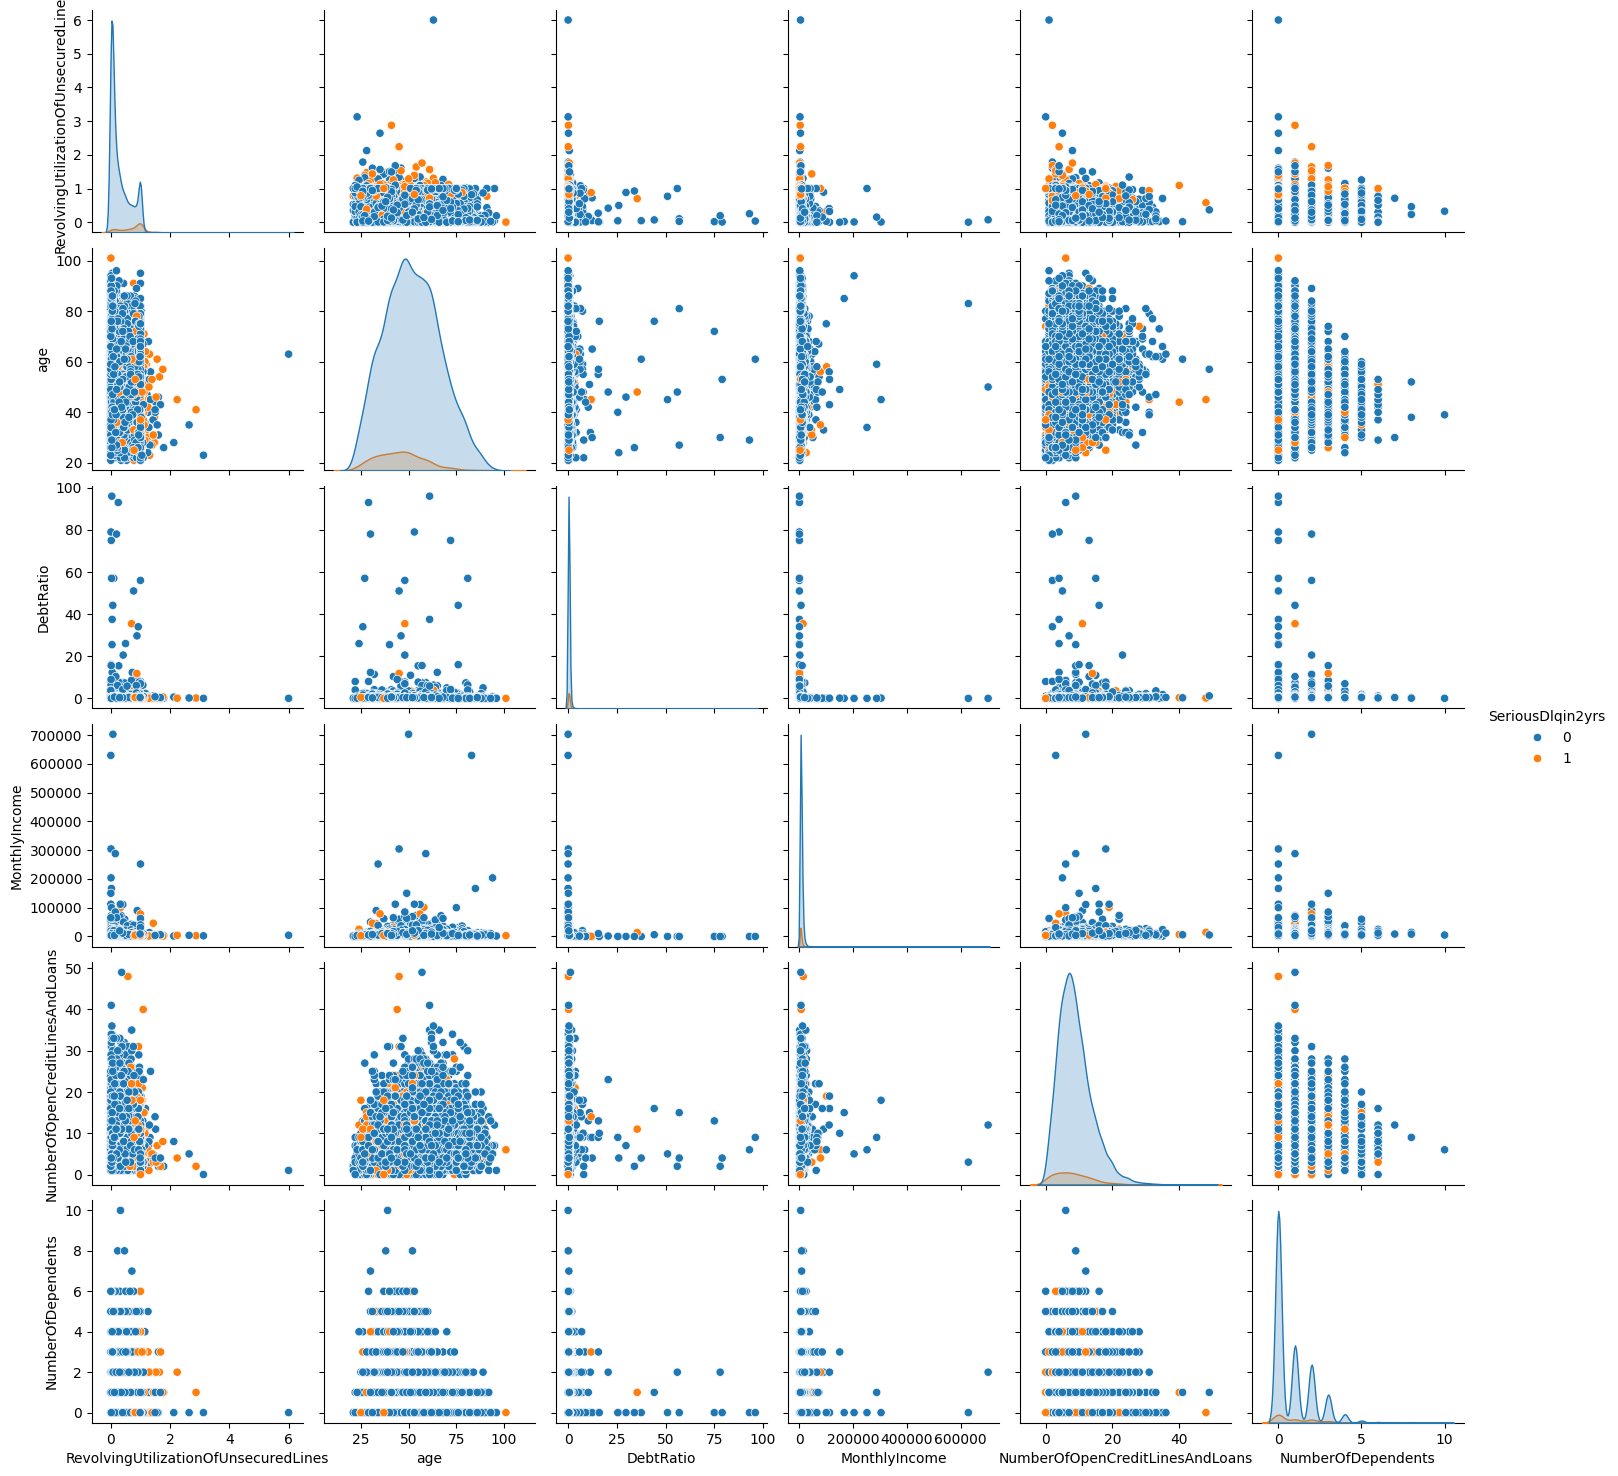

In [29]:
sns.pairplot(train_set[features_num + [target]], hue = target)

No puedo apreciar mucho con el pairplot

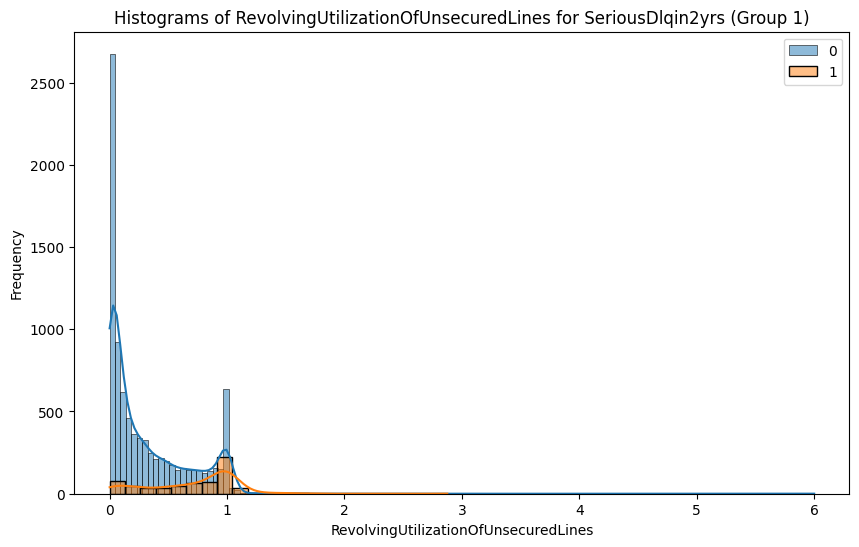

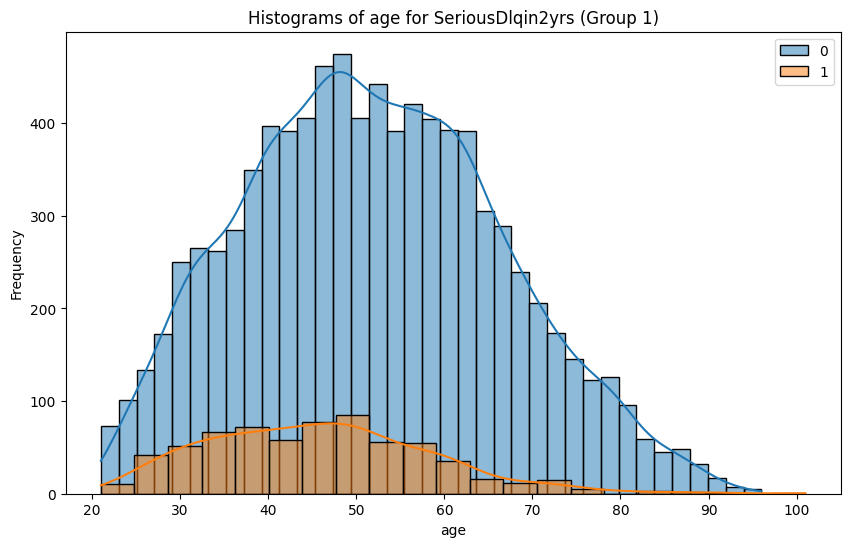

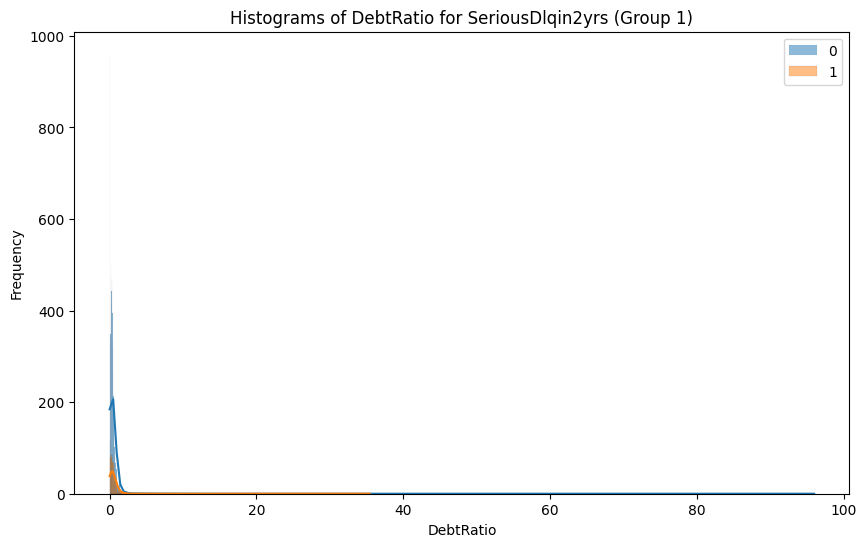

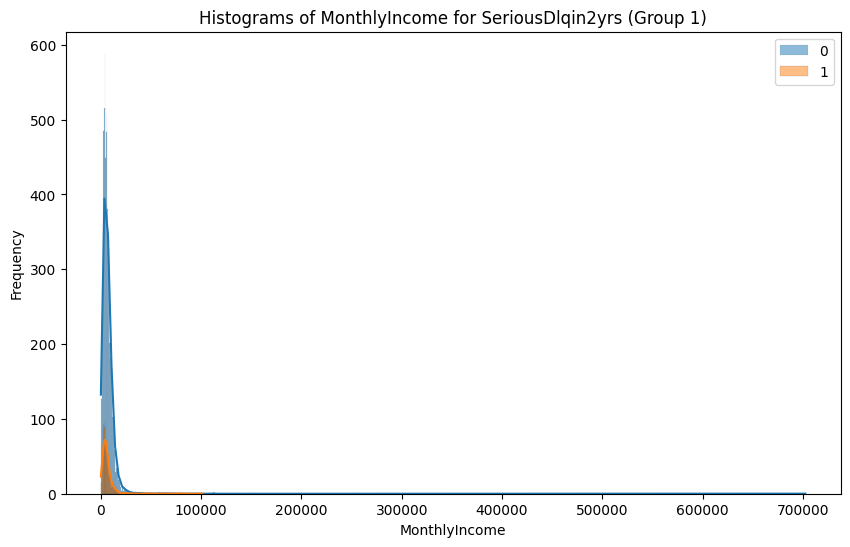

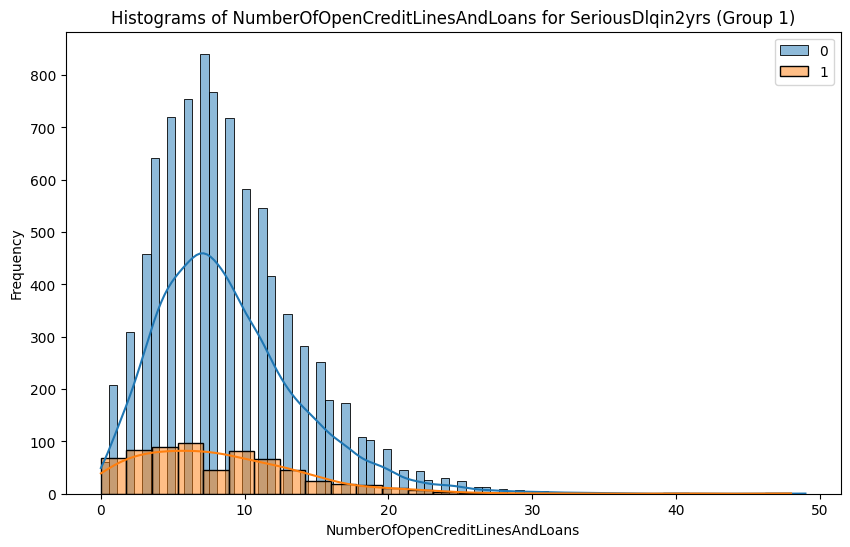

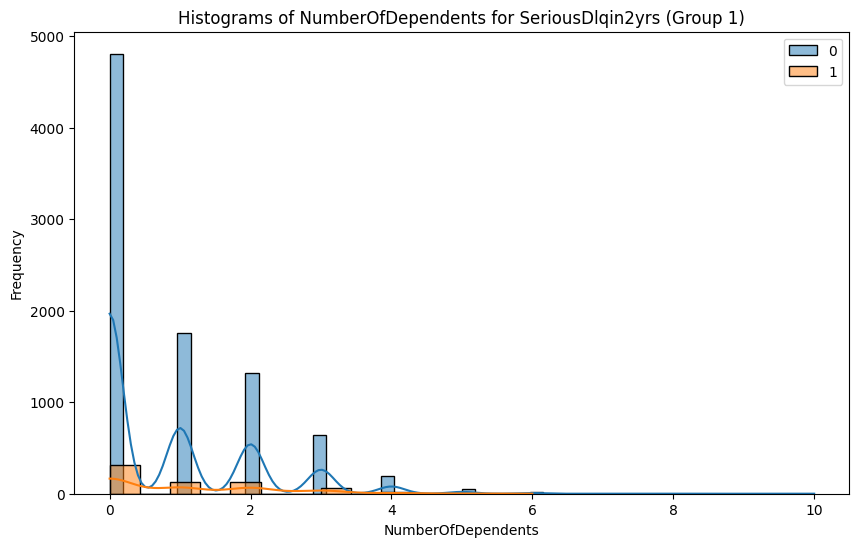

In [30]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

Me llama la atencion en el primer grafico las diferencias que hay, me la guardo y me quedo con age tambien.

In [56]:
features_visual = ['RevolvingUtilizationOfUnsecuredLines', 'age']

Anlaizo DebtRatio y MonthlyIncome por los outliers que tienen

In [61]:
from scipy.stats import mannwhitneyu

cat_col = target
num_col = "MonthlyIncome"

grupo_a = train_set.loc[train_set[cat_col] == 0][num_col]
grupo_b = train_set.loc[train_set[cat_col] == 1][num_col]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 3309844.0
Valor p: 4.937655211085433e-09


Me la quedo

In [62]:
features_visual.append('MonthlyIncome')

In [63]:
cat_col = target
num_col = "DebtRatio"

grupo_a = train_set.loc[train_set[cat_col] == 0][num_col]
grupo_b = train_set.loc[train_set[cat_col] == 1][num_col]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 2623985.5
Valor p: 1.9202882288986672e-05


Me la quedo tambien 

In [64]:
features_visual.append('DebtRatio')

Analizo las categoricas

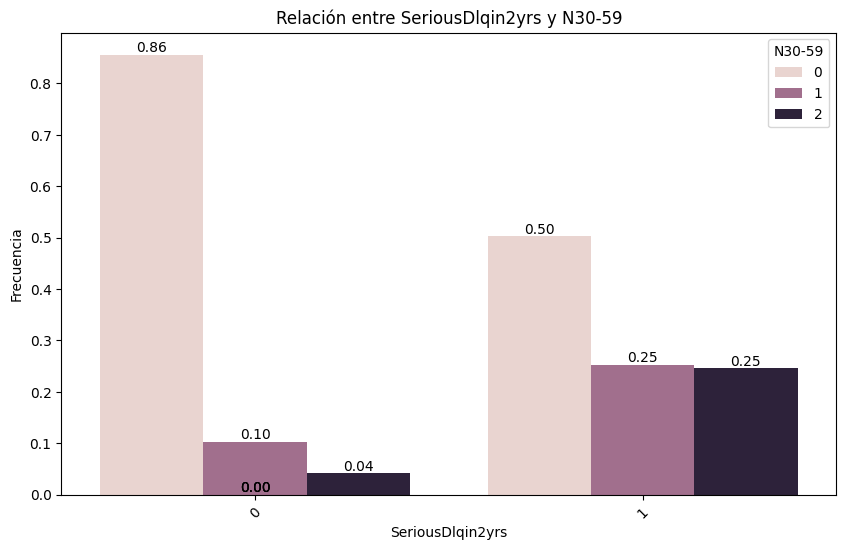

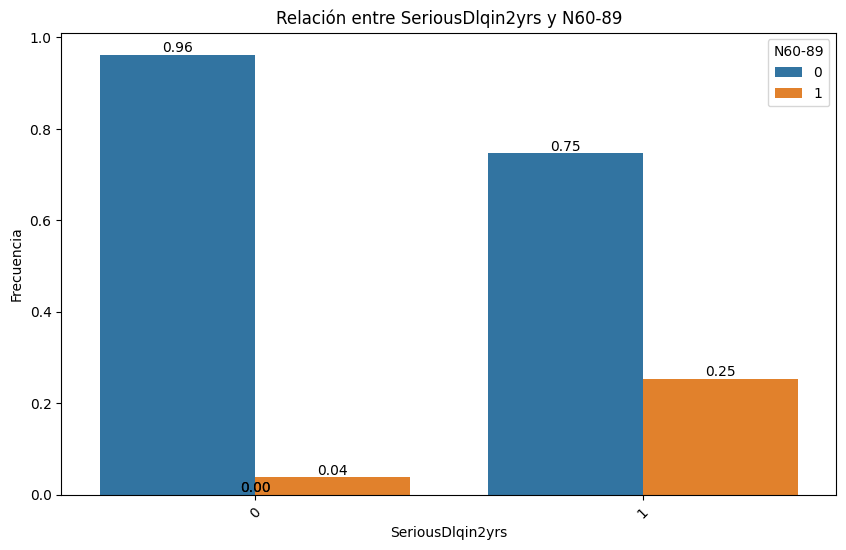

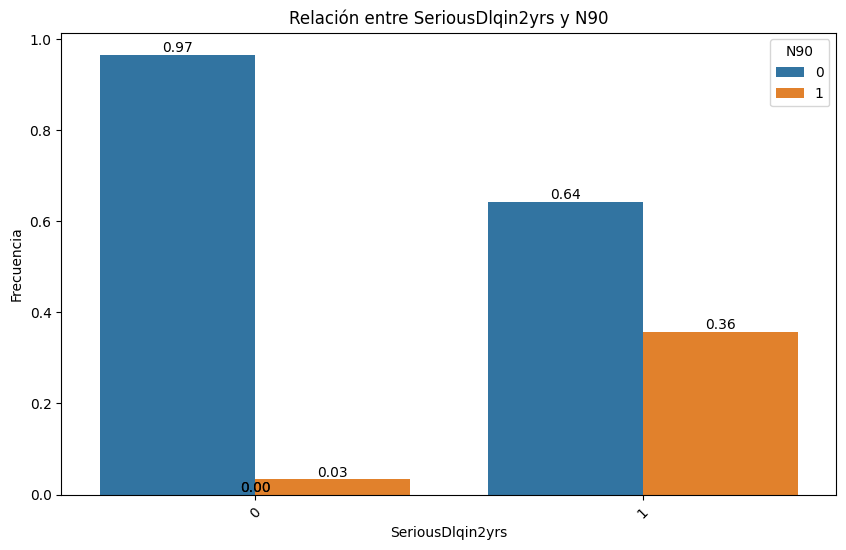

In [57]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, col, relative_freq=True, show_values=True)

Veo diferencias interesantes, me quedo con las 3

In [58]:
features_cat

['N30-59', 'N60-89', 'N90']

In [59]:
features_visual.extend(['N30-59', 'N60-89', 'N90'])

In [65]:
features_visual

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N30-59',
 'N60-89',
 'N90',
 'MonthlyIncome',
 'DebtRatio']

In [66]:
#Hago el analisis de umbral de varianza

from sklearn.feature_selection import VarianceThreshold

for umbral_varianza in np.arange(0,1,0.1):
    print(f"Para umbral = {umbral_varianza}")
    var_selector = VarianceThreshold(umbral_varianza)
    var_selector.fit(train_set[features_visual])
    print("Lista seleccionada por selector de Varianza", var_selector.get_feature_names_out())

Para umbral = 0.0
Lista seleccionada por selector de Varianza ['RevolvingUtilizationOfUnsecuredLines' 'age' 'N30-59' 'N60-89' 'N90'
 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.1
Lista seleccionada por selector de Varianza ['RevolvingUtilizationOfUnsecuredLines' 'age' 'N30-59' 'MonthlyIncome'
 'DebtRatio']
Para umbral = 0.2
Lista seleccionada por selector de Varianza ['age' 'N30-59' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.30000000000000004
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.4
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.5
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.6000000000000001
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.7000000000000001
Lista seleccionada por selector de Varianza ['age' 'MonthlyIncome' 'DebtRatio']
Para umbral = 0.8
Lista seleccionada por selecto

In [67]:
features_visual

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N30-59',
 'N60-89',
 'N90',
 'MonthlyIncome',
 'DebtRatio']

In [68]:
#Analisis ANOVA

X_train = train_set[features_num]
y_train = train_set[target]

selector_num = SelectKBest(f_classif, k=4)
x_data_kbest = selector_num.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector_num.get_feature_names_out())
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
0,0.391240,68.0,13.0,0.0
1,0.906540,59.0,7.0,1.0
2,0.933223,52.0,3.0,3.0
3,0.857859,50.0,9.0,0.0
4,0.000000,61.0,5.0,1.0
...,...,...,...,...
9447,0.397822,53.0,14.0,0.0
9448,0.015171,76.0,4.0,0.0
9449,0.988201,62.0,4.0,0.0
9450,0.122072,41.0,9.0,1.0


In [70]:
features_filtered = list(X_train_kbest.columns)
features_filtered

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

In [72]:
from sklearn.feature_selection import mutual_info_classif

X_train = train_set[features_cat]
y_train = train_set[target]

selector_cat = SelectKBest(mutual_info_classif, k=3)
x_data_kbest = selector_cat.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector_cat.get_feature_names_out())
X_train_kbest

,N30-59,N60-89,N90
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0
...,...,...,...
9447,0,0,0
9448,0,0,0
9449,0,0,0
9450,0,0,0


Me quedo con las 3

In [73]:
features_filtered += features_cat

In [74]:
features_filtered

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'N30-59',
 'N60-89',
 'N90']

In [76]:
#Select from Model


from sklearn.feature_selection import SelectFromModel


features = features_num + features_cat

rf_selector = RandomForestClassifier(random_state= 42, class_weight= "balanced") 

selector_modelo = SelectFromModel(estimator = rf_selector, threshold="median") 

selector_modelo.fit(train_set[features], train_set[target]) 
features_modelo = list(selector_modelo.get_feature_names_out())
features_modelo

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [77]:
#RFE

from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42, class_weight= "balanced")

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 6, 
          step = 1)


rfe.fit(train_set[features], train_set[target])

RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_features_to_select=6)

In [78]:
features_RFE = list(rfe.get_feature_names_out())
features_RFE

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'N30-59']

Me agregó 'N30-59'

In [80]:
#SFS

from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(class_weight= "balanced", random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy",
                                        n_jobs = -1)


sfs_forward.fit(train_set[features], train_set[target])





SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          n_features_to_select=5, n_jobs=-1,
                          scoring='balanced_accuracy')

In [82]:
features_SFS = list(sfs_forward.get_feature_names_out())
features_SFS

['NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents',
 'N30-59',
 'N60-89',
 'N90']

In [83]:
#Hard Voting
from collections import Counter

lista_total = features_visual + features_filtered + features_modelo + features_RFE + features_SFS
votaciones = Counter(lista_total)
votaciones

Counter({'RevolvingUtilizationOfUnsecuredLines': 4,
         'age': 4,
         'N30-59': 4,
         'NumberOfOpenCreditLinesAndLoans': 4,
         'N60-89': 3,
         'N90': 3,
         'MonthlyIncome': 3,
         'DebtRatio': 3,
         'NumberOfDependents': 2})

In [84]:
votos = pd.DataFrame(votaciones.values(), columns = ["Votos"], index = votaciones.keys()).sort_values("Votos", ascending = False)
votos

,Votos
RevolvingUtilizationOfUnsecuredLines,4
age,4
N30-59,4
NumberOfOpenCreditLinesAndLoans,4
N60-89,3
N90,3
MonthlyIncome,3
DebtRatio,3
NumberOfDependents,2


In [85]:
features_hard_voting = votos["Votos"].nlargest(6).index.to_list()
features_hard_voting

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'N30-59',
 'NumberOfOpenCreditLinesAndLoans',
 'N60-89',
 'N90']

In [86]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



nombres = [f"Seleccion {nombre}" for nombre in ["visual", "filter", "modelo", "rfe", "sfs", "voting"]]
model_names = ["Random Forest","XGBoost", "LightGBM"]

rf_clf = RandomForestClassifier(class_weight= "balanced", random_state= 42)
xg_clf = XGBClassifier(random_state  = 42, scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]))
lgb_clf = LGBMClassifier(class_weight= "balanced", random_state= 42, verbose = -100, n_jobs= -1)

models = [rf_clf, xg_clf, lgb_clf]
resultados = []

for indice, lista in enumerate([features_visual, features_filtered, features_modelo, features_RFE, features_SFS, features_hard_voting]):
    X_train = train_set[lista]
    y_train = train_set[target]
    
    for model_name, modelo in zip(model_names, models):
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy"))
        data = {
            "features_list": nombres[indice],
            "model": model_name,
            "avg. recall": metrica
        }
        print(data)
        resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("avg. recall", ascending = False)


{'features_list': 'Seleccion visual', 'model': 'Random Forest', 'avg. recall': np.float64(0.5705349256105455)}
{'features_list': 'Seleccion visual', 'model': 'XGBoost', 'avg. recall': np.float64(0.6421136054439914)}
{'features_list': 'Seleccion visual', 'model': 'LightGBM', 'avg. recall': np.float64(0.718585685857393)}
{'features_list': 'Seleccion filter', 'model': 'Random Forest', 'avg. recall': np.float64(0.5731518336623512)}
{'features_list': 'Seleccion filter', 'model': 'XGBoost', 'avg. recall': np.float64(0.6507265458983644)}
{'features_list': 'Seleccion filter', 'model': 'LightGBM', 'avg. recall': np.float64(0.7336713375413791)}
{'features_list': 'Seleccion modelo', 'model': 'Random Forest', 'avg. recall': np.float64(0.5173814152965448)}
{'features_list': 'Seleccion modelo', 'model': 'XGBoost', 'avg. recall': np.float64(0.5973493921608772)}
{'features_list': 'Seleccion modelo', 'model': 'LightGBM', 'avg. recall': np.float64(0.680560875635669)}
{'features_list': 'Seleccion rfe', '

,features_list,model,avg. recall
5,Seleccion filter,LightGBM,0.733671
17,Seleccion voting,LightGBM,0.731434
14,Seleccion sfs,LightGBM,0.731070
2,Seleccion visual,LightGBM,0.718586
11,Seleccion rfe,LightGBM,0.708522
13,Seleccion sfs,XGBoost,0.700690
8,Seleccion modelo,LightGBM,0.680561
16,Seleccion voting,XGBoost,0.665001
4,Seleccion filter,XGBoost,0.650727
12,Seleccion sfs,Random Forest,0.642919


Me quedo con LightGBM

In [88]:
#Evaluo sobre las distintas features

#features_filtered
from sklearn.model_selection import  GridSearchCV


param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100, n_jobs = -1)

lgb_grid_2 = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=1)

lgb_grid_2.fit(train_set[features_filtered],y_train)



GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, verbose=-100), n_jobs=1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [89]:
lgb_grid_2.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [90]:
lgb_grid_2.best_score_

np.float64(0.7558418761196298)

In [91]:
X_test = test_set[features_filtered]
y_test = test_set[target]

In [92]:
from sklearn.metrics import classification_report

y_pred = lgb_grid_2.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2197
           1       0.21      0.65      0.31       167

    accuracy                           0.80      2364
   macro avg       0.59      0.73      0.60      2364
weighted avg       0.91      0.80      0.84      2364



In [93]:
#Sobre SFS

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100)

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(train_set[features_SFS],y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-100), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [94]:
lgb_grid.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [95]:
lgb_grid.best_score_

np.float64(0.7459015146705378)

In [96]:
X_test = test_set[features_SFS]
y_test = test_set[target]

In [97]:
y_pred = lgb_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2197
           1       0.22      0.60      0.32       167

    accuracy                           0.82      2364
   macro avg       0.59      0.72      0.61      2364
weighted avg       0.91      0.82      0.85      2364



In [98]:
#Todas las variables


param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100],
    "class_weight":["balanced",None]
}

lgb_clf = LGBMClassifier(verbose = -100, n_jobs = -1)

lgb_grid_3 = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=1)

lgb_grid_3.fit(train_set[features],y_train)



GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, verbose=-100), n_jobs=1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [99]:
lgb_grid_3.best_params_

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_data_in_leaf': 100,
 'n_estimators': 100}

In [100]:
lgb_grid_3.best_score_

np.float64(0.7529599290634367)

In [101]:
X_test = test_set[features]
y_test = test_set[target]

In [102]:
y_pred = lgb_grid_3.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2197
           1       0.23      0.67      0.34       167

    accuracy                           0.82      2364
   macro avg       0.60      0.75      0.62      2364
weighted avg       0.92      0.82      0.85      2364




### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.